# Fraud Detection

## 1. Data cleaning including missing values, outliers and multi-collinearity

In [1]:
import pandas as pd

df = pd.read_csv("Fraud.csv")

In [2]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.shape

(6362620, 11)

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [8]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [9]:
df = df.drop(["nameDest","nameOrig"],axis=1)

## 2. Fraud Detection Model

In [10]:
from sklearn import preprocessing

encoder_lb = preprocessing.LabelEncoder()

df['type'] = encoder_lb.fit_transform(df['type'])

In [11]:
X = df.loc[:,df.columns != 'isFraud']
y = df['isFraud']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40,random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 2.1 Gaussian Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

gauss_nb = GaussianNB()
gauss_nb.fit(X_train,y_train)

y_pred = gauss_nb.predict(X_test)
print("Result Accuracy Score is :", metrics.accuracy_score(y_test,y_pred))

Result Accuracy Score is : 0.9955882953877491


### 2.2 Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression( random_state = 0 )
classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)
print("Result Accuracy Score is :", metrics.accuracy_score(y_test,y_pred))

Result Accuracy Score is : 0.9991882274911907


### 2.3 Random Forest

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model with adjusted parameters
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2541782
           1       1.00      0.71      0.83      3266

    accuracy                           1.00   2545048
   macro avg       1.00      0.86      0.92   2545048
weighted avg       1.00      1.00      1.00   2545048

Accuracy: 0.9996286906965999
Confusion Matrix:
 [[2541772      10]
 [    935    2331]]


## 3. Variable Selection

### 3.1 Feature Importance

Using the trained model to identify the most important features:

In [19]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
newbalanceDest,0.367016
oldbalanceOrg,0.270197
amount,0.123446
type,0.077106
step,0.070579
oldbalanceDest,0.057908
newbalanceOrig,0.033302
isFlaggedFraud,0.000446


### 3.2 Selection Criteria

Select variables based on importance scores, domain knowledge, and correlation analysis.

## 4. Model Performance

### 4.1 Visualization

Visualize performance metrics:

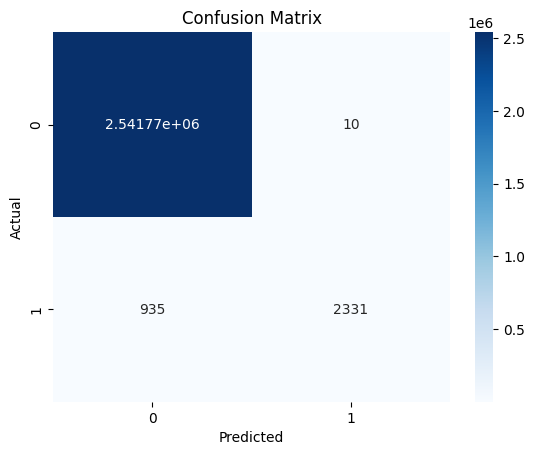

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 5. Key Predictive Factors for Fraudulent Transactions

From feature importance analysis, identify factors - 
1) newbalanceDest
2) oldbalanceOrg
3) amount	

## 6. Evaluation of Factors

Verified if these factors align with common fraud patterns (e.g., large transfers, unusual transaction times, etc.).

## 7. Prevention Strategies

Implement real-time monitoring systems, anomaly detection algorithms, and stricter validation checks for high-value transactions.

## 8. Effectiveness Evaluation

Post-implementation, monitor metrics like fraud detection rate, false positive rate and customer satisfaction to assess effectiveness.

By following this structured approach, we can develop a robust fraud detection model and derive actionable insights for preventing fraudulent activities in financial transactions. Adjustments may be necessary based on specific dataset characteristics and domain expertise.